In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Here we import dataset to python and assign it to data variable
data = pd.read_csv("/kaggle/input/celeba-dataset/list_attr_celeba.csv")

In [12]:
# We have a quick look into the data
data.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [13]:
# This codes gives general information about the number of data and the type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

In [14]:
# We make list of young and old celebrities.
young=[]
old=[]
for i in data.Young.values:
    if i == 1:
        young.append(i)
    else:
        old.append(i)

([<matplotlib.axis.YTick at 0x7b88fd4a6830>,
 [Text(0, 156734, '156734'), Text(0, 45865, '45865')])

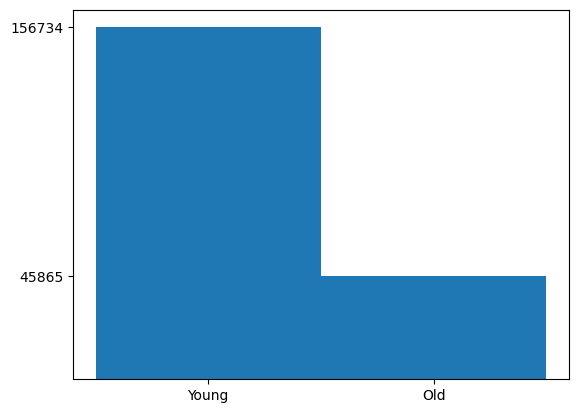

In [15]:
# Bar chart that shows the number of young and old celebrity
top=[('Young',young.count(1)),('Old',old.count(-1))]
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = 1
plt.bar(xs, ys, width, align='center')
plt.xticks(xs, labels) 
plt.yticks(ys)

In [16]:
# we drop the "image_id" colomn because we dont need it while coding
data.drop(["image_id"],axis=1,inplace = True)

In [17]:
# we assign Young feature as y variable which is our target data her.
y = data.Young.values
# we drop Young feature from data set and assign it as x_data 
x_data = data.drop(["Young"],axis=1)

In [18]:
# Normalization
# Normalization is required if there is big diffirence between your features data
# Here there is not big difference but I prefer it to keep program in safe
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [20]:
# Train-Test Split
# Here we split the data 80 percent for training and 20 percent for testing
# we write random_state=42 because if you rerun code, it splits by using same rule
# As a result of using random_state=42, we can get same accuracy.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [21]:
# Logistic regression
# Here we import and use logistic regression to make and test model.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
# score predicts and gives the accuracy of model 
print("test accuracy {}".format(lr.score(x_test,y_test)))

test accuracy 0.8495557749259625


In [22]:
# Here we import dataset to python and assign it to data1 variable
data1 = pd.read_csv("/kaggle/input/celeba-dataset/list_attr_celeba.csv")

In [23]:
# We make list of men and women celebrities.
Man=[]
Woman=[]
for i in data.Male.values:
    if i == 1:
        Man.append(i)
    else:
        Woman.append(i)

([<matplotlib.axis.YTick at 0x7b88f1589810>,
 [Text(0, 84434, '84434'), Text(0, 118165, '118165')])

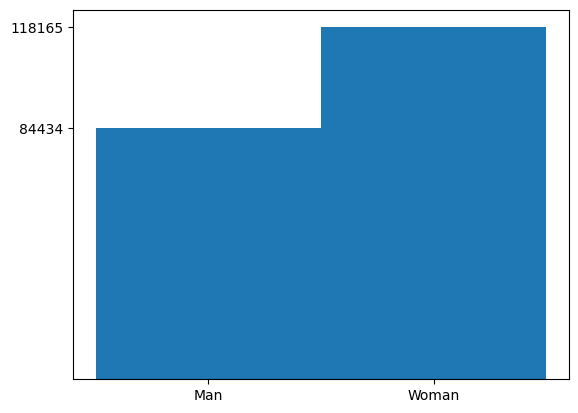

In [24]:
# Bar chart that shows the number of man and woman celebrity
top=[('Man',Man.count(1)),('Woman',Woman.count(-1))]
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = 1
plt.bar(xs, ys, width, align='center')
plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)

In [25]:
# we drop the "image_id" colomn because we dont need it while coding
data1.drop(["image_id"],axis=1,inplace = True)

In [26]:
# we assign Young feature as y1 variable which is our target data her.
y1 = data.Male.values
# we drop Young feature from data set and assign it as x_data1 
x_data1 = data.drop(["Male"],axis=1)

In [27]:
# Normalization
# Normalization is required if there is big diffirence between your features data
# Here there is not big difference but I prefer it to keep program in safe
x1 = (x_data1 - np.min(x_data1))/(np.max(x_data1)-np.min(x_data1)).values

In [28]:
# Train-Test Split
# Here we split the data 70 percent for training and 30 percent for testing
# we write random_state=42 because if you rerun code, it splits by using same rule
# As a result of using random_state=42, we can get same accuracy.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size = 0.3,random_state=42)

In [29]:
# Logistic regression
# Here we import and use logistic regression to make and test model.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() 
lr.fit(x_train,y_train)
# score predicts and gives the accuracy of model  
print("test accuracy {}".format(lr.score(x_test,y_test)))

test accuracy 0.9325600526488976
